In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("max_column",100)

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

# Classification

## Split Train Test Data

In [3]:
import pandas as pd
df = pd.read_csv("fraud.csv")

# Split Feature and Label
X = df.drop(columns=['index','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress','Fraud','Fraud_Decoded'])
y = df['Fraud_Decoded'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
df.head()

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,44,0,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,111,1,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,131,2,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,85,0,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,411,2,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2,0,1,0


## Logistic Regression
sklearn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

<b>Prediction Result (in data test)</b>

In [5]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [6]:
model.predict_proba(X_test)

array([[8.60808668e-01, 1.39191332e-01],
       [8.15207128e-01, 1.84792872e-01],
       [1.33120861e-03, 9.98668791e-01],
       [7.61692707e-01, 2.38307293e-01],
       [3.25348768e-01, 6.74651232e-01],
       [7.86231837e-01, 2.13768163e-01],
       [9.91230498e-01, 8.76950206e-03],
       [9.87225523e-01, 1.27744768e-02],
       [1.96449523e-11, 1.00000000e+00],
       [8.17746679e-01, 1.82253321e-01],
       [9.57284536e-01, 4.27154645e-02],
       [1.95919595e-05, 9.99980408e-01],
       [9.61790557e-01, 3.82094435e-02],
       [8.33694444e-01, 1.66305556e-01],
       [1.48662645e-01, 8.51337355e-01],
       [7.54141058e-01, 2.45858942e-01],
       [2.53610754e-04, 9.99746389e-01],
       [7.30009649e-01, 2.69990351e-01],
       [8.26071666e-01, 1.73928334e-01],
       [6.77721111e-01, 3.22278889e-01],
       [1.33652681e-01, 8.66347319e-01],
       [6.96221282e-01, 3.03778718e-01],
       [7.85021675e-01, 2.14978325e-01],
       [9.94463100e-01, 5.53689989e-03],
       [1.926522

In [7]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

<b>Evaluation</b>

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6904761904761905

In [9]:
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.56
Recall (Test Set): 0.67
F1-Score (Test Set): 0.61
AUC: 0.80


In [10]:
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.86


In [11]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.85
Test score:0.6976744186046512


### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Logistic Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- C: nilai regularization
- penalty: menggukanan l2 norm (ridge), l1 (lasso), atau elastic net
- solver: metode bagaimana kita melakukan update pada variable di logistic regression (slope/intercept): liblinear bagus jika data sedikit; sag & saga bagus jika data besar (karena menggunakan metode sampling)

In [12]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.90
Recall (Test Set): 0.60
F1-Score (Test Set): 0.72
AUC: 0.81


In [13]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.93


In [14]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.0001


In [15]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9285714285714286
Test score:0.9


# K-nearest Neighbor
sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## CHALLENGE TIME (2)
Lakukan modeling dengan kNN, inisialisasi modelnya dengan nama variable `model`

In [ ]:
### ISI JAWABAN CHALLENGE 2 DISINI ya ###

### ISI JAWABAN CHALLENGE 2 DISINI ya ###

# Prediction & Evaluation
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

### Hyperparameter Tuning with RandomSearch
<b>Hyperparameter yang biasa di tuning pada kNN:</b> (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- n_neighbors: jumlah tetangga yang kita lihat
- weights: jika menggunakan pembobotan pada kNN. pembobotan bisa berdasarkan jarak (i.e. semakin dekat jaraknya semakin besar bobotnya)
- algorithm: berbagai macam algoritma yang kita gunakan untuk menghitung jarak dan membandingkan jarak satu dengan yang lainnya (brute, kd_tree, ball_tree, etc.)
    - leaf_size: digunakan jika kita menggunakan algoritma kd_tree saja. membandingkan jarak dengan pendekatan tree based algorithm
- p: cara menghitung jarak antar data point. 1 untuk manhattan distance, 2 untuk euclidean distance, >2 untuk minkowski distance

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.90
Recall (Test Set): 0.60
F1-Score (Test Set): 0.72
AUC: 0.74


In [17]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 6
Best p: 1
Best algorithm: kd_tree


In [18]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8888888888888888
Test score:0.9


underfit!

## Decision Tree
sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

### Fit & Predict

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.47
Recall (Test Set): 0.60
F1-Score (Test Set): 0.53
AUC: 0.62


In [20]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.627906976744186


overfit

### Hyperparameter Tuning with RandomSearch
<b>Hyperparameter yang biasa di tuning pada Decision Tree:</b> (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- criterion: cara menghitung impurity pada feature (gini, entropy). melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model
- splitter: bagaimana kita memilih feature untuk dilakukan split, dan apakah ada jumlah batasan feature yang akan di split tersebut

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.79
Recall (Test Set): 0.73
F1-Score (Test Set): 0.76
AUC: 0.89


In [22]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [23]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9393939393939394
Test score:0.7857142857142857


applying several regularization help to prevent overfit

## CHALLENGE TIME (3)
- Tambahkan dan coba hyperparameter `criterion` dan `splitter` pada Decision Tree
- reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

#### LENGKAPI DENGAN JAWABAN CHALLENGE TIME DISINI ####


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
#### TAMBAHKAN JAWABAN CHALLENGE TIME DISINI ####

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision') 
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.77
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
AUC: 0.79


In [25]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 106
Best min_samples_split: 5
Best min_samples_leaf: 2
Best max_features: auto
Best criterion: gini
Best splitter: best


In [26]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 1.0
Test score:0.7692307692307693


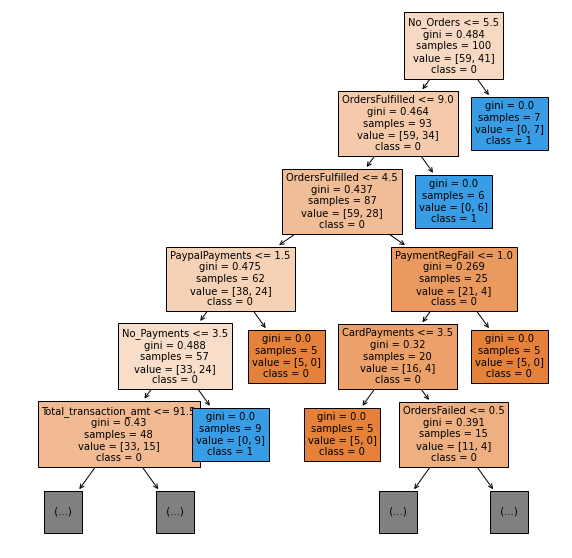

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

<b>Hyperparameter yang biasa di tuning pada Decision Tree:</b> (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- criterion: cara menghitung impurity pada feature (gini, entropy). melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model
- splitter: bagaimana kita memilih feature untuk dilakukan split, dan apakah ada jumlah batasan feature yang akan di split tersebut

# Feature Importance

Text(0.5, 1.0, 'feature importance score')

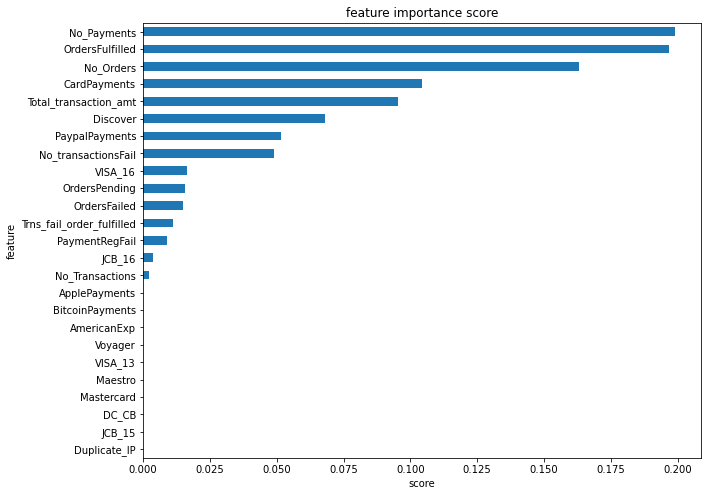

In [28]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# CHALLENGE TIME (4)
Gunakan top-5 feature dari hasil feature importance. apakah performa dari model meningkat?

In [ ]:
### TULISKAN SOLUSI CHALLENGE 4 DISINI ###

### TULISKAN SOLUSI CHALLENGE 4 DISINI ###

# Suggestion for Next Learning
Notebook ini hanya membahas mengenai logistic regression, k nearest neighbor dan decision tree, masih ada banyak sekali algoritma yang digunakan untuk klasifikasi, seperti naive bayes, support vector machines, neural network, dll. jika teman-teman tertarik dapat melihat dokumentasi penggunaannya di python pada dokumentasi scikit-learn disini: https://scikit-learn.org/stable/supervised_learning.html

Terima kasih dan tetap semangat :)